# **Sentimental Analysis on Twitter Data**

In [ ]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as пр
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
print(dir(tweepy))

['API', 'AppAuthHandler', 'BadRequest', 'Cache', 'Client', 'Cursor', 'DirectMessageEvent', 'FileCache', 'Forbidden', 'HTTPException', 'List', 'Media', 'MemoryCache', 'NotFound', 'OAuth1UserHandler', 'OAuth2AppHandler', 'OAuth2BearerHandler', 'OAuth2UserHandler', 'OAuthHandler', 'Paginator', 'Place', 'Poll', 'ReferencedTweet', 'Response', 'Space', 'Stream', 'StreamResponse', 'StreamRule', 'StreamingClient', 'TooManyRequests', 'TweepyException', 'Tweet', 'TwitterServerError', 'Unauthorized', 'User', '__author__', '__builtins__', '__cached__', '__doc__', '__file__', '__license__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'api', 'auth', 'cache', 'client', 'cursor', 'direct_message_event', 'errors', 'list', 'media', 'mixins', 'models', 'pagination', 'parsers', 'place', 'poll', 'space', 'streaming', 'tweet', 'user', 'utils']


# **Accessing Twitter**

In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving login.csv to login (1).csv


In [ ]:
# Get the data
log = pd.read_csv('login.csv')
log

In [ ]:
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret= log['key'][3]

In [ ]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)


authenticate.set_access_token(accessToken, accessTokenSecret)


#api = tweepy.API(authenticate, wait_on_rate_limit = True)
api = tweepy.API(authenticate)

# **Extraction of Tweets as Data Set**

In [ ]:
tweets = api.user_timeline(screen_name="@elonmusk",count=200,include_rts = False,tweet_mode = 'extended')

In [ ]:
for info in tweets[:3]:
     print("ID: {}".format(info.id))
     print(str(info.created_at))
     print(str(info.full_text))
     print("\n")

ID: 1618135928526213120
2023-01-25 06:37:23
@BretWeinstein Will investigate


ID: 1618135302190804992
2023-01-25 06:34:54
@MarioNawfal South Korea has an even lower birth rate


ID: 1618051634734706688
2023-01-25 01:02:26
@JudiciaryGOP @SpeakerMcCarthy This is important




In [ ]:
i = 0
for tweet in tweets:
  print(str(i) + ') '+tweet.full_text+ '\n')
  i=i+1

0) @BretWeinstein Will investigate

1) @MarioNawfal South Korea has an even lower birth rate

2) @JudiciaryGOP @SpeakerMcCarthy This is important

3) @slashdot Population collapse is a major risk to the future of civilization 
https://t.co/ZI8QRt2Ev4

4) @thomasmidleton @VivekGRamaswamy Far too much power is concentrated in the hands of “shareholder services” companies like ISS and Glass Lewis, because so much of the market is passive/index funds, which outsource shareholder voting decisions to them.

ISS and Glass Lewis effectively control the stock market.

5) @alx That turned out to be um … inaccurate

6) @JonErlichman Good thread

7) @billysteeler85 @NicoleBehnam That too

8) @NicoleBehnam I don’t like the taste or effects of most alcohol, but there is something quite beautiful about red wine in a fine glass

9) @MarioNawfal It can summarized with one emoji: 😴

10) @unusual_whales !

11) @WholeMarsBlog Maybe one day

12) @SmokeAwayyy Big year for AI

13) @NicoleBehnam 🤣

14) @MuskU

In [ ]:

df = pd.DataFrame( [tweet.full_text for tweet in tweets] , columns=['Tweets'])


df.head()

,Tweets
0,@BretWeinstein Will investigate
1,@MarioNawfal South Korea has an even lower bir...
2,@JudiciaryGOP @SpeakerMcCarthy This is important
3,@slashdot Population collapse is a major risk ...
4,@thomasmidleton @VivekGRamaswamy Far too much ...


# **Exploratory Data Analysis**

In [ ]:

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#','', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  return text

df['Tweets']= df['Tweets'].apply(cleanTxt)

df

,Tweets
0,Will investigate
1,South Korea has an even lower birth rate
2,This is important
3,Population collapse is a major risk to the fu...
4,Far too much power is concentrated in the ha...
...,...
182,_feed Exactly. Money is actually a set of hete...
183,"Zerohedge can be jerks at times, but they di..."
184,_feed Sea water contains enough of every eleme...
185,There should be a game show: “4Chan or Davo...


In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment. subjectivity


def getPolarity(text):
  return TextBlob(text).sentiment.polarity


df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,Will investigate,0.0000,0.000000
1,South Korea has an even lower birth rate,0.0000,0.000000
2,This is important,1.0000,0.400000
3,Population collapse is a major risk to the fu...,0.3125,0.031250
4,Far too much power is concentrated in the ha...,0.5500,0.275000
...,...,...,...
182,_feed Exactly. Money is actually a set of hete...,0.4500,0.083333
183,"Zerohedge can be jerks at times, but they di...",0.0000,0.000000
184,_feed Sea water contains enough of every eleme...,0.4500,0.000000
185,There should be a game show: “4Chan or Davo...,0.4000,-0.400000


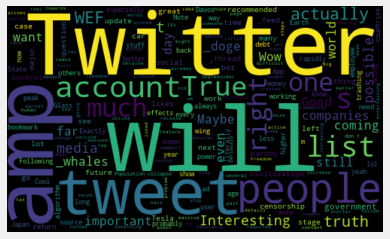

In [ ]:
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

# **Polarity**

In [ ]:
def getAnalysis(score):
    if (score < 0):
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,Will investigate,0.0000,0.000000,Neutral
1,South Korea has an even lower birth rate,0.0000,0.000000,Neutral
2,This is important,1.0000,0.400000,Positive
3,Population collapse is a major risk to the fu...,0.3125,0.031250,Positive
4,Far too much power is concentrated in the ha...,0.5500,0.275000,Positive
...,...,...,...,...
182,_feed Exactly. Money is actually a set of hete...,0.4500,0.083333,Positive
183,"Zerohedge can be jerks at times, but they di...",0.0000,0.000000,Neutral
184,_feed Sea water contains enough of every eleme...,0.4500,0.000000,Neutral
185,There should be a game show: “4Chan or Davo...,0.4000,-0.400000,Negative


In [ ]:
# Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
          print(str(j) + ') '+sortedDF[ 'Tweets' ][i])
          print()
          j=j+1

1)   This is important

2)  Population collapse is a major risk to the future of civilization 


3)   Far too much power is concentrated in the hands of “shareholder services” companies like ISS and Glass Lewis, because so much of the market is passive/index funds, which outsource shareholder voting decisions to them.

ISS and Glass Lewis effectively control the stock market.

4)  Good thread

5)  I don’t like the taste or effects of most alcohol, but there is something quite beautiful about red wine in a fine glass

6)  Major respect for the makers

7)  Wow

8) _doge   Wow, lot has happened in 13 years

9)  One of my favorite features

10)  Probably a good idea

11)  True

12)   We are going to great lengths to avoid the Wikipedia left wing editorial control problem. By the same token, Community Notes cannot be biased towards the right either. Maximizing for truth is the goal.

13)  Always liked that design

14)   True

15)      lmao

16)  Absolutely. Freedom means freedom to die when

In [ ]:
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if( sortedDF['Analysis' ][i] == 'Negative'):
     print(str(j) + ') '+ sortedDF['Tweets'][i])
     print()
     j= j+1


1)   No change in copper production is required for the transition to sustainable energy. 

Lithium refinement needs to increase dramatically, but lithium ore itself is extremely common throughout Earth.

2)  Yeah, we’re thinking hard about this

3)  That is a little delayed, as a key researcher can only travel to Twitter in early Feb

4) _whales The note is incorrect. There are ~2300 active, working employees at Twitter.

There are still hundreds of employees working on trust &amp; safety, along with several thousand contractors. 

Less than 10 people from my other companies are working at Twitter.

5)  And my cousin, who is young &amp; in peak health, had a serious case of myocarditis. Had to go to the hospital.

6)  Two of the worst possible curses:
- You will live forever
- You can have anything you want

7) There are epic tweets in other countries every day (Japan especially)

8)  Macron is doing the difficult, but right thing. The retirement age of 62 was set when lifespans were 

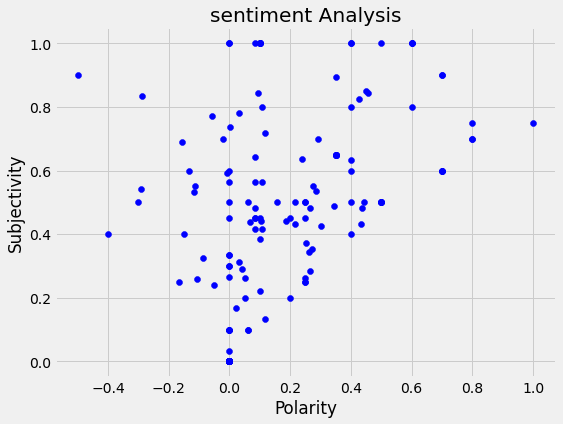

In [ ]:
plt. figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity' ][i], df['Subjectivity'][i], color='Blue' )

plt.title('sentiment Analysis')
plt.xlabel( 'Polarity')
plt.ylabel( 'Subjectivity')
plt.show()

In [ ]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0]) *100 , 1)

53.5

In [ ]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round( (ntweets.shape[0]/df.shape[0] *100), 1)

9.6

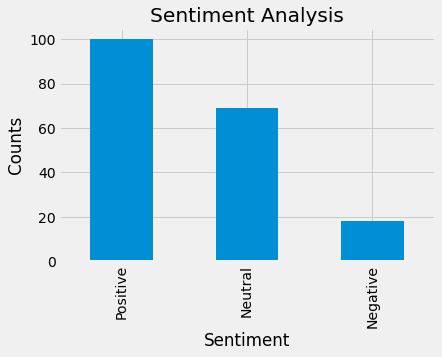

In [ ]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()